Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Train Accuracy: 0.9619047619047619
Test Accuracy: 1.0


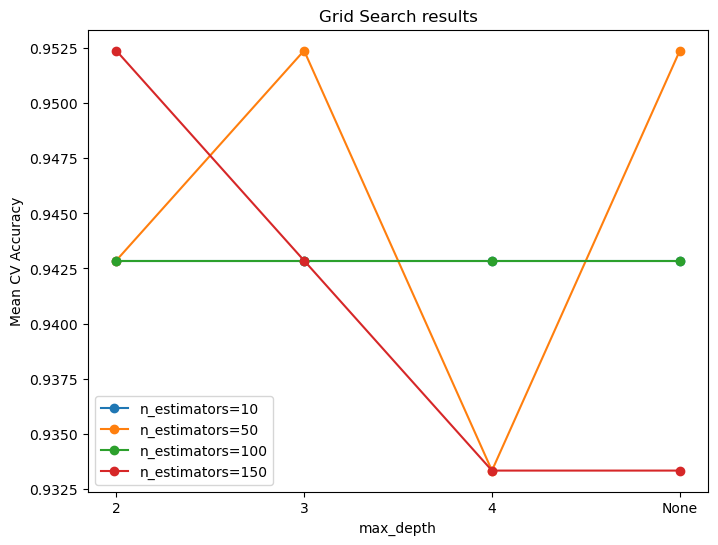

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {
 'n_estimators': [10, 50, 100, 150],
 'max_depth': [2, 3, 4, None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['n_estimators']), 
len(param_grid['max_depth']))
plt.figure(figsize=(8,6))
for i, n in enumerate(param_grid['n_estimators']):
 plt.plot([str(d) for d in param_grid['max_depth']], scores[i], marker='o', label=f'n_estimators={n}')
plt.xlabel('max_depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search results')
plt.legend()
plt.show()